**The usual rules apply to this notebook**

In [1]:
# Do not delete this cell
# Do execute it
import numpy as np

**Ergodicity for Markov Chains**

In this assignment we focus on stationary Markov chains $X_0,X_1,\ldots,$ with a finite state space
i.e. Markov chains that

- can only take values in a set $\{ 0,1,\ldots,K-1\}$ for some positive integer $K,$ and
- that have a single transition matrix $Q = \left(q_{i,j}\right)_{i,j=0,\ldots,K-1}$ that is valid at all time steps, i.e.

$$
P[ X_{t+1}=j \vert X_t = i] = q_{ij}, \mbox{ for } t=0,1,\ldots, \mbox { and } i,j=0,\ldots,K-1.
$$

Given such a Markov chain, consider a probability distribution 

$$
\pi = (\pi_0,\ldots,\pi_{K-1})
$$ 

on the states, so $\pi_i\geq 0,i=0,\ldots,K-1$ and $\sum_{i=0}^{K-1} \pi_i = 1.$
We say that $\pi$ is a *stationary distribution* for the Markov chain if, given that 
the Markov chain at time $t$ is distributed according to $\pi$ then the same is true at time $t+1,$ i.e. given that

$$
P[X_t = i] = \pi_i, \mbox{ for } i=0,\ldots,K-1,
$$

then 

$$
P[X_{t+1} = i] = \pi_i, \mbox{ for } i=0,\ldots,K-1.
$$

Recall from the previous assignment, if the distribution of $X_t$ is the row-vector $\pi$ then the distribution of $X_{t+1}$  is given by 

$$
\pi Q.
$$

So $\pi$ to a stationary distribution for the Markov chain if and only if 

$$
\pi Q = \pi.
$$

In other words, $\pi^t$ is an eigenvector of $Q^t$ with eigenvalue 1. (Here the $Q^t$ refers to the *transpose* of $Q$ and $\pi^t$ refers to the transpose of $\pi.$)



**Problem 1 (5 points)** 

Consider the 4 state Markov chain with the following properties.

- Starting in state 0 the chain can move to state 1 with probability 1/2 and to state 3 with probability 1/2,
- Starting in state 1 the chain can stay in state 1 with probability 1/2 and to state 2 with probability 1/2,
- Starting in state 2 the chain can move to state 1 with probability 1/2 and to state 3 with probability 1/2,
- Starting in state 3 the chain can move to state 0 with probability 1/2 and to state 3 with probability 1/2

In the following cell, create a 2d numpy array with the transition matrix for this chain and assign a variable called **Q1** to this array.

In [2]:
# Code cell for Problem 1 - do not modify or delete this line
Q1=np.array(([0, 1/2, 0, 1/2], [0, 1/2, 1/2, 0], [0, 1/2, 0, 1/2], [1/2, 0, 0, 1/2]))

In [3]:
# Print cell for Problem 1 - do not modify or delete this cell
# Do execute it
print(Q1)

[[0.  0.5 0.  0.5]
 [0.  0.5 0.5 0. ]
 [0.  0.5 0.  0.5]
 [0.5 0.  0.  0.5]]


**Problem 2 (5 points)**

Find the stationary distribution for the Markov chain whose transition matrix is defined in Problem 1 and assign this to a 1d numpy array called **pi1** in the code cell below.

Note: You can use numpy's np.linalg.eig to get eigenvalues and eigenvectors but you can also try to get the answer by hand.


In [4]:
# Code cell for Problem 2 - do not modify or delete this line
eigenvalues, eigenvectors = np.linalg.eig(Q1)
i = np.where(np.isclose(eigenvalues, 1, atol=1e-5))
stationary = eigenvectors[:,i]
pi1 = stationary / np.sum(stationary, axis = 0)
pi1 = pi1.T

In [5]:
# Print cell for Problem 2 - do not modify or delete this cell
# Do execute it
print(pi1)

[[[0.25 0.25 0.25 0.25]]]


**Remaining stationary**

Observe that when we have

$$
\pi Q = \pi,
$$

and at some time $t$ we have

$$
P[X_t = i] = \pi_i, \mbox{ for } i=0,\ldots,K-1,
$$

then it is the case that 

$$
P[X_s = i] = \pi_i, \mbox{ for } i=0,\ldots,K-1,
$$

for all $s>t.$ To see this, recall that we can get the distribution of $X_s$ from that of $X_t$ using matrix multiplication. 

$$
P[X_s = i] = \pi Q^{s-t}
$$

and since $\pi Q = \pi$ the right hand side equals

$$
\pi Q Q^{s-t-1} = \pi Q^{s-t-1} = \pi Q Q^{s-t-2} = \pi Q^{s-t-2} = \ldots = \pi Q = \pi 
$$

so we get the desired conclusion, i.e. once stationary, we remain stationary.

It is possible to reach stationarity at a future time, even if we don't have stationarity at the current time.

**Problem 3 (5 points)**

For the Markov chain defined in Problem 1, find a probability distribution 

$$
\tau = [\tau_0,\tau_1,\tau_2,\tau_3]
$$ 

(a row vector) that is **not** equal to the stationary distribution found
in Problem 2, but which as the property that if

$$
P[X_t = i] = \tau_i, \mbox{ for } i=0,1,2,3,
$$

then

$$
P[X_{t+1} = i] = \pi_i, \mbox{ for } i=0,1,2,3.
$$

It is recommended that you try to solve this problem by hand.

In the following cell, assign a 1d numpy array to a variable called **tau3**.

In [6]:
# Code cell for Problem 3 - do not modify or delete this line
tau3 = np.array([0, 0.5, 0, 0.5])

In [7]:
# Print cell for Problem 3 - do not modify or delete this cell
# Do execute it
print(tau3)

[0.  0.5 0.  0.5]


**Ergodicity for Markov Chains**

Given a stationary Markov chain $X_0,X_1,\ldots,$ with transition matrix $Q,$ and state space $\{ 0,1,\ldots,K-1\}$ under appropriate conditions there exists a stationary distribution $\pi$ and the limiting distribution of $X_t$ is the stationary distribution, i.e. 

$$
\lim_{t\rightarrow \infty} P[ X_t = i ] = \pi_i, \mbox{ for all } i=0,1,\ldots,K-1.
$$

no matter what the distribution of $X_0$ happens to be.
If the Markov chain starts in state $i$ then we know that the probability distribution of the process at ime $n$ is given by

$$
\nu  Q^n.
$$

where

$$
\nu = [0,0,\ldots,0,1,0,\ldots,0]
$$

(the 1 being in position $i$).

But then

$$
\nu  Q^n.
$$

is the $i$-th row of $Q^n$ so ergodicity states that the
limit of $Q^n$ is a matrix all of whose rows are equal to $\pi.$

**Sufficient conditions for ergodicity**

Here is a necessry and sufficient condition for ergodicity: there exists a positive integer $n>0$ such that every entry of $Q^n$ is positive.

Recall that the $i,j$ entry of the matrix $Q^n$ is 

$$
P[ X_{t+n}=j \vert X_t = i] 
$$

so our condition states that there exists a value of $n$ such that for every pair of states $i,j,$ starting in any state $i$ we can reach state $j$ with positive probability.

**Some definitions**

A Markov chain is said to be **recurrent** if for all states $i$ and $j,$ starting in state $i$ it is always possible to reach state $j$ in a finite number of steps. In other words, for all states $i$ and $j$ there exists $n>0$ such that $(Q^n)_{i,j}>0.$

It is easy to given an example of a Markov chain that is not recurrent. Consider the chain with the following transition matrix:

$$
\left[
\begin{array}{cccc}
1/3 & 2/3 & 0 & 0 \\
2/3 & 1/3 & 0 & 0 \\
0 & 0 & 1/4 & 3/4 \\
0 & 0 & 2/3 & 1/3 \\
\end{array}
\right]
$$

Starting in state 0 or state 1 we can never reach state 2 or state 3.

**Periodicity**

For a Markov chain with transition matrix $Q,$ and starting in state $i,$ define $H_i$ to be the set of positive times $n$ such that it is possible to reach state $i$ again in the future, i.e.

$$
H_i = \{ n ~:~ (Q^n)_{i,j}>0 \}
$$

and define the **period** $d(i)$ of state $i$ to be the greatest common diviser of the values in $H_i.$

A chain is said to be **aperiodic** if $d(i)=1$ for every state $i.$

For example, consider the chain with the following transition matrix.


$$
\left[
\begin{array}{cccc}
0 & 2/3 & 1/3 & 0 \\
2/3 & 0 & 0 & 1/3 \\
0 & 1/4 & 3/4 & 0 \\
1/4 & 0 & 0 & 3/4 \\
\end{array}
\right]
$$

So we can only move from state 0 or state 2 to state 1 or 2 in one step or from state 1 or 3 to state 0 or 3 in one step. So for every state $i$ we have 

$$
H_0 = \{ 2,4,6,\ldots \}
$$

and $d(i)=2.$  This chain not aperiodic.

The condition that $d(i)=1$ is the same as saying that there exists $n>0$ such that $(Q^m)_{i,i}>0$ for all $m \geq n.$

**Theorem. If a Markov chain with finite state space is irreducible and aperiodic then it is ergodic.**

**Problem 4 (5 points)**

In the following code cell, compute the tenth power of the transition matrix Q1 from Problem 1, and assign it to a variable called **Q1power10**.

In [8]:
# Code cell for Problem 4 - do not modify or delete this line
Q1power10 = np.linalg.matrix_power(Q1, 10)

In [9]:
# Print cell for Problem 4 - do not modify or delete this cell
# Do execute it
print(Q1power10)

[[0.16699219 0.33300781 0.16699219 0.33300781]
 [0.16601562 0.33398438 0.16699219 0.33300781]
 [0.16699219 0.33300781 0.16699219 0.33300781]
 [0.16699219 0.33300781 0.16601562 0.33398438]]


**Make sure you examine the matrix in the previous problem and understand the importance of what you observe qualitatively.**

**Problem 5 (5 points)**

The range of column $j$ of a matrix $Q=(q_{ij})$ is defined to be 

$$
\mbox{Range}(Q,j) = \max_i q_{i,j}-\min_i q_{i,j}.
$$

This measures how close the elements in that column are to one another.
We can measure how close a matrix $Q$ is to having constant rows by the maximum of all of the column's ranges:

$$
\max_j \mbox{Range}(Q,j)
$$


Write a function called **max_column_range** that takes as input 

- a (square) matrix **Q**,

and returns as outputs 

- the maximum of the ranges of all of the columns of the 

Your function should be fully self-contained i.e. all variables and functions used (except numpy constants and functions) should be defined in the body of your function.

Use the following code cell for your solution.

In [10]:
# Code cell for Problem 5 - do not modify or delete this line
def max_column_range(Q):
    ans = np.zeros(Q.shape[1])
    for c in range(Q.shape[1]):
        ans[c] = max(Q[:, c]) - min(Q[:, c])
    return max(ans)

In the following test cell, we create a random transition 25 x 25 matrix and compute the maximum column range of its powers. To create that random matrix, we take each row to consist of independent exponential random variables, and we normalize each row by dividing it by its sum. (This gives each row a *Dirichlet* distribution.)

    i            max range        log max range
    1         0.2293804688        -1.4723732181
    2         0.0475479886        -3.0460157912
    3         0.0095649513        -4.6496497728
    4         0.0017193046        -6.3658353471
    5         0.0003998882        -7.8243256227
    6         0.0000720984        -9.5374785976
    7         0.0000137802       -11.1922810766
    8         0.0000024739       -12.9097075615
    9         0.0000004781       -14.5533440812
   10         0.0000000983       -16.1356898866
   11         0.0000000171       -17.8846903311
   12         0.0000000033       -19.5273437896
   13         0.0000000007       -21.0971475968
   14         0.0000000001       -22.6755633884
   15         0.0000000000       -24.3599034563
   16         0.0000000000       -25.9306484512
   17         0.0000000000       -27.5187338728
   18         0.0000000000       -29.1993372358
   19         0.0000000000       -30.8871156241
   20         0.0000000000       -32.353

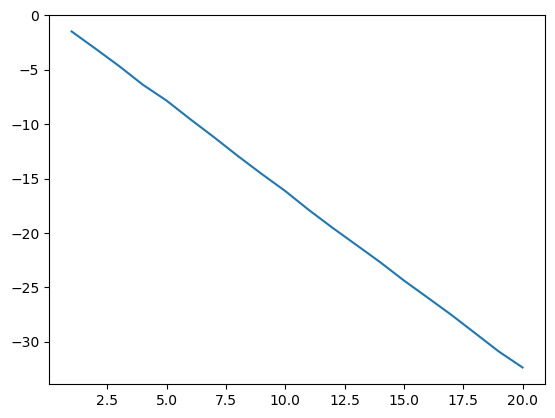

In [11]:
# Test cell1  for Problem 5 - do not modify or delete this cell
# Do execute it
import matplotlib.pyplot as plt

K=25
A=np.zeros((K,K))
for i in range(K):
    x=np.random.exponential(1,(1,K))
    x=x/np.sum(x)
    A[i:,]=x

s="{0:>5s} {1:>20s} {2:>20s}".format("i","max range","log max range")
print(s)
log_mrange=[]
for i in range(1,21):
    M=max_column_range(np.linalg.matrix_power(A,i))
    s="{0:5d} {1:20.10f} {2:20.10f}".format(i,M,np.log(M))
    print(s)
    log_mrange.append(np.log(M))
plt.plot(range(1,21),log_mrange)

This illustrates how, under ergodicity, convergence to the stationary distribution happens exponentially fast!**

**Problem 6 (10 points)**

Consider a Markov chain whose state space consists of the permutations of 0,1,...,N-1 for some choice of $N,$ where if our current state at time $t$ is the permutation

$$
X_t=(k_0,k_1,\ldots,k_{N-1})
$$

we can move to another permutation that differs from the current one in only two positions, or we remain at the same permuation. The move is obtained 

- by sampling  two positions $I$ and $J$ unoformly and *with* replacement from $\{ 0,1,\ldots,N-1\},$ 

- swapping what is in position $I$ with what is in position $J.$ 

So that at time $t+1$ the state becomes 

$$
(k'_0,k'_1,\ldots,k'_{N-1})
$$

where 

- $k'_i$ is the same as $k_i$ for $i\neq I,J$ and 
- $k'_I = k_J,$ and 
- $k'_J = k_I.$

When $I\neq J$ the function that swaps the values in the two position is referred to as a *transposition.*

Write a function called **transposition** that takes as input 

- **N** a positive integer, and 
- **k** a **list** of size N defining a permutation of $0,1,\ldots,N-1.$

and that outputs 

- **kprime** a **list** of size N defining a permutation of $0,1,\ldots,N-1$ that is obtained by implementing a random transposition as described above.

Your function should be fully self-contained.

Use the following cell for your code.

In [12]:
# Code cell for Problem 6 - do not modify or delete this line
def transposition(N,k):
    I, J = np.random.choice(k, 2)
    k[I], k[J] = k[J], k[I]
    return k

In [13]:
# Test cell for Problem 6 - do not modify or delete this cell
# Do execute it
N=10
k=list(range(N))
for i in range(100):
    k=transposition(N,k)
    print(k)

[0, 9, 2, 3, 4, 5, 6, 7, 8, 1]
[0, 9, 2, 3, 4, 5, 6, 7, 8, 1]
[0, 9, 2, 3, 4, 5, 7, 6, 8, 1]
[0, 9, 6, 3, 4, 5, 7, 2, 8, 1]
[0, 9, 6, 3, 4, 5, 7, 2, 8, 1]
[0, 9, 6, 3, 4, 8, 7, 2, 5, 1]
[0, 9, 6, 3, 7, 8, 4, 2, 5, 1]
[0, 9, 6, 3, 7, 8, 5, 2, 4, 1]
[0, 9, 6, 3, 7, 4, 5, 2, 8, 1]
[0, 9, 6, 3, 7, 4, 5, 2, 8, 1]
[0, 9, 6, 3, 7, 8, 5, 2, 4, 1]
[0, 9, 6, 3, 7, 8, 5, 4, 2, 1]
[8, 9, 6, 3, 7, 0, 5, 4, 2, 1]
[8, 2, 6, 3, 7, 0, 5, 4, 9, 1]
[8, 2, 6, 3, 7, 0, 9, 4, 5, 1]
[8, 2, 6, 3, 5, 0, 9, 4, 7, 1]
[8, 1, 6, 3, 5, 0, 9, 4, 7, 2]
[8, 1, 6, 3, 5, 0, 9, 4, 7, 2]
[8, 1, 7, 3, 5, 0, 9, 4, 6, 2]
[8, 1, 7, 3, 5, 4, 9, 0, 6, 2]
[9, 1, 7, 3, 5, 4, 8, 0, 6, 2]
[9, 1, 7, 3, 0, 4, 8, 5, 6, 2]
[7, 1, 9, 3, 0, 4, 8, 5, 6, 2]
[7, 8, 9, 3, 0, 4, 1, 5, 6, 2]
[7, 0, 9, 3, 8, 4, 1, 5, 6, 2]
[7, 0, 4, 3, 8, 9, 1, 5, 6, 2]
[7, 0, 6, 3, 8, 9, 1, 5, 4, 2]
[7, 8, 6, 3, 0, 9, 1, 5, 4, 2]
[7, 8, 6, 3, 0, 9, 1, 4, 5, 2]
[7, 8, 6, 3, 0, 9, 5, 4, 1, 2]
[7, 8, 6, 3, 2, 9, 5, 4, 1, 0]
[7, 8, 0, 3, 2, 9, 5, 4, 1, 6]
[7, 8, 0

**Problem 7 (10 points)**

Now we want to run our Markov chain on the permutations of 0,1,...,N-1 many steps to produce a pseudo-random permutation.

Write a function called **generate_permuation** that takes as inputs

- **N** a positive integer
- **Ntranspositions** a positive integer

and returns as output

- **k** a list defining a permutation of the numbers 0,1,...,N-1 that results from starting with the list [0,1,,...,N-1] and making Ntranspositions randiom transpositions of that list.

Your code should call the function you created in problem 6 so **should not** include it below.

Use the following code cell for your code

In [14]:
# Code cell for Problem 7 - do not delete or modify this line
def generate_permutation(N,Ntranspositions):
    l = list(range(N))
    for i in range(Ntranspositions):
        l = transposition(N,l)
    return l

In [15]:
# Test cell for Problem 7 - do not modify this cell
# Do execute it
k=generate_permutation(100,100)
print(k)

[92, 91, 53, 83, 39, 24, 6, 29, 10, 9, 8, 1, 12, 31, 14, 3, 16, 33, 97, 19, 40, 7, 44, 30, 54, 94, 84, 20, 98, 87, 0, 69, 56, 77, 76, 27, 79, 41, 67, 65, 66, 28, 63, 61, 75, 36, 11, 47, 48, 35, 89, 46, 72, 68, 49, 55, 23, 43, 95, 22, 21, 37, 82, 57, 60, 90, 26, 58, 85, 15, 74, 71, 42, 73, 5, 45, 38, 62, 78, 59, 80, 70, 17, 52, 81, 51, 86, 2, 18, 13, 64, 50, 93, 88, 25, 4, 32, 34, 96, 99]


**How many transpositions are needed to reach "randomness"?**

Let's compare using the permutation generator you created in Problem 7 with numpy's random permutation function. To do this, we choose some statistic, i.e. a function that takes a permutation and outputs a real number, and see how many tranpositions it takes to get the permutation generator based on transpositions to produce statistics whose mean and standard deviation resemble what we get when we use "truly random" permutations (i.e. those give by numpy's random.permutation function).  

Here are some examples of functions taking a permutation $(k_0,\ldots,k_{N-1})$ as input and outputting a real number:

- the value of $k_0+k_1+k_2+k_3$ 
- the number of times we have $k_i < k_{i+1}$
- the length of the longest contiguous increasing subsequence
- the average absolute difference between neighboring values of the permutation (defined below).

**Problem 8 (25 points)**

**Longest contiguous increasing subsequence*

Here is an example of a permutation of 0,1,...,9:

6,5,1,0,2,3,8,9,4,7

the longest increasing contiguous subsequence in this case is

0,2,3,8,9

and it's length is 5. *Contiguous* means the values appear in succession in the permutation.

For another example, the permutation

0,1,2,3,4,5,6,7,8,9

has a longest increasing contiguous subsequence


0,1,2,3,4,5,6,7,8,9,

which is of length 9.

For 

9,8,7,6,5,4,3,2,1,0

there are multiple longest increasing contiguous sequences, and they all
have length 1.

Write a function called **LICS** that takes as input 

- **N** a positive integer, and
- **k** a list defining a permutation of 0,1,...,N-1. 

and outputs 

- **L** the length (**an integer**) of the longest contiguous increasing subsequence of $k.$

Your function should be fully self-contained.

In [16]:
# Code cell for Problem 8 - do not delete or modify this line
def LICS(N,k):
    record = []
    count = 1
    for i in range(len(k) - 1):
        if k[i] < k[i + 1]:
            count += 1
        else:
            count = 1
        record.append(count)
    return max(record)

**Expected  LICS using numpy's permutation generator**

In the following cell, we repeat the process of using numpy to generate a random permutation of 0,1,...,9, for 1,000,000 trials and use the LICS of the  
generated permutations to estimate the expected value $\mu = E[LICS(K)]$ and standard deviation $\sigma = SD[LICS(K)]$ of the LICS of a random permutation $K$ of 0,1,...,9.

In [17]:
# Test cell for Problem 8 - do not delete or modify this cell
# Do execute it
np.random.seed(103)
N=10
ntrials=1000000
LICS_samples=np.zeros(ntrials)
for i in range(ntrials):
    k=list(np.random.permutation(range(N)))
    LICS_samples[i]=LICS(N,k)
mu=LICS_samples.mean()
sd=LICS_samples.std()
print(round(mu,2))
print(round(sd,2))

3.06
0.79


**Problem 9 (5 points)**

Think of the mu and signa produced in the test cell in Problem 8 as producing the *ground truth* $\mu = E[LICS(K)]$ and standard deviation $\sigma = SD[LICS(K)]$ of the LICS for a random permutation $K$, so we are making two key assumptions:

- the numpy random permutation function really produces random permutations, and 
- the Monte-Carlo sample size of 1,000,000 is so large that the sampling error is very small

Now we test your random permutation generator based on various values of **T** the number of transpositions used.

For each choice of $T$ from 1 to 25 (including 25) do the following.
Generate a sample of 10,000 permutations of 0,1,...,9 each based on **T** transpositions starting from the permutation 0,1,...,9, and use the sample to arrive at an estimate of $mu = E[LICS(K)]$ and $\sigma = \mbox{SD}[LICS(K)].$ Put these in lists  called **muhat** and **sigmahat** each of length 25 with the estimate based on 1 tranposition first, 2 transpositions second, and so on.

Use the following cell for your code.

In [18]:
# Code cell for Problem 9 - do not delete or modify this line
T = [i for i in range(1, 26)]
muhat = []
sigmahat = []
for i in T:
    results = []
    for j in range(10000):
        sample = generate_permutation(10, i)
        results.append(LICS(10, sample))
    muhat.append(np.mean(results))
    sigmahat.append(np.std(results))

In [19]:
# Print cell for Problem 9 - do not delete or modify this cell
# Do execute it.
for T in range(25):
    print(T+1,round(muhat[T],3),round(sigmahat[T],3))

1 6.362 1.761
2 4.937 1.572
3 4.195 1.331
4 3.768 1.184
5 3.511 1.034
6 3.374 0.964
7 3.293 0.928
8 3.21 0.86
9 3.182 0.862
10 3.152 0.842
11 3.12 0.824
12 3.106 0.807
13 3.09 0.809
14 3.079 0.809
15 3.081 0.797
16 3.075 0.788
17 3.074 0.796
18 3.068 0.789
19 3.064 0.784
20 3.061 0.795
21 3.052 0.793
22 3.064 0.798
23 3.058 0.795
24 3.06 0.784
25 3.059 0.784


**Problem 10 (5 points)** 

Here we do the same thing as in Problem 8, except we use a different statistic.
This time we take as our statistic the mean absolute difference between each entry in the permutation and its sucessor, that is, for the permutation 
$k=(k_0,\ldots,k_{N-1})$ we define 

$$
MAD = \frac{1}{N-1} \sum_{i=0}^{N-2} \vert k_i - k_{i+1} \vert 
$$

In the following code cell, define a function called **MAD** that takes as arguments:

-- **N** a positive integer, and
-- **k** a list defining a permutation of 0,1,...,N-1 

and that returns 

-- **MAD** for the permutation k as defined above.



In [20]:
# Code cell for Problem 10 - do not delete or modify this line
def MAD(N,k):
    sum = 0
    for i in range(0, N-1):
        sum += abs(k[i] - k[i + 1])
    ans = sum / (N - 1)
    return ans

**Expected  MAD using numpy's permutation generator**

In the following cell, we repeat the process of using numpy to generate a random permutation of 0,1,...,9, for 1,000,000 trials and use this to approximate the 
expected value $\mu=E[MAD(K)]$ and standard deviation $\sigma = SD[MAD(K)]$ of the MAD of a random permutation $K$ of 0,1,2,3,4,5,6,7,8,9.

In [21]:
# Test cell for Problem 10 - do not delete or modify this cell
# Do execute it
np.random.seed(103)
N=10
ntrials=1000000
MAD_samples=np.zeros(ntrials)
for i in range(ntrials):
    k=list(np.random.permutation(range(N)))
    MAD_samples[i]=MAD(N,k)
mu=MAD_samples.mean()
sd=MAD_samples.std()
se=sd/np.sqrt(ntrials)
print(round(mu,2))
print(round(sd,2))

3.67
0.63


**Problem 11 (5 points)**

Again think of the mu produced in the test cell in Problem 10 as producing the *ground truth* mean of the MAD for a random permutation. For each choice of $T$ from 1 to 25 (including 25) do the following. Generate a sample of 10,000 permutations of 0,1,...,9 each based on T transpositions of 0,1,...,9, and use this sample to arrive at an estimate of $mu = E[MAD(K)]$ and $\sigma = \mbox{SD}[MAD(K)]$ for a random permutation of 0,1,\...,9. Put these in lists called **muhat** and **sigmahat** each of length 25 with the estimate based on 1 tranposition first, 2 transpositions second, and so on.

Use the following cell for your code.

In [22]:
# Code cell for Problem 11 - do not delete or modify this line
T = [i for i in range(1, 26)]
muhat = []
sigmahat = []
for i in T:
    results = []
    for j in range(10000):
        sample = generate_permutation(10, i)
        results.append(MAD(10, sample))
    muhat.append(np.mean(results))
    sigmahat.append(np.std(results))

In [23]:
# Print cell for Problem 11 - do not delete or modify this cell
# Do execute it.
for T in range(24):
    print(T+1,round(muhat[T],3),round(sigmahat[T],3))

1 1.905 0.742
2 2.514 0.819
3 2.898 0.809
4 3.146 0.773
5 3.316 0.732
6 3.421 0.711
7 3.49 0.682
8 3.55 0.658
9 3.586 0.643
10 3.596 0.641
11 3.626 0.632
12 3.635 0.634
13 3.651 0.637
14 3.643 0.632
15 3.662 0.636
16 3.662 0.632
17 3.658 0.631
18 3.666 0.627
19 3.658 0.632
20 3.668 0.628
21 3.672 0.635
22 3.67 0.635
23 3.674 0.629
24 3.658 0.629


**An important application of these ideas**

There are many applications in which we need to draw samples from finite set according to some known probability distribution $\pi$. The following idea is commonly used. Create an ergodic Markov chain $X_0,X_1,\ldots$ whose state space consists of that finite set, and whose stationary distribution is $\pi.$ To generate samples, we start at some initial state, run the Markov chain for a long time $T$ and take $X_T$ to be the sampled value.

We'll see more about this in the next homework assignment.

**Important**

- Make sure all cells run without errors.
- Make sure you save your notebook before submitting it.